Цель задания - исследование группы функций

$$f(x) = sin(\frac{x}{5})\cdot e^{\frac{x}{10}}+5e^{-\frac{x}{2}}$$

$$g(x) = 1 - x^3 + x^5$$

$$h(x)=\frac{5\cdot\sin^2{(e^{0.8x})}\cdot x^2}{e^{\frac{x^2}{2}}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(array):
    fxs = []
    for x in array:
        if x != 0:
            fx = np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)
            fxs.append(fx)
        else:
            fxs.append(np.inf)
    return np.array(fxs)

def g(array):
    fxs = []
    for x in array:
        if x != 0:
            fx = 1 - x**3 + x**5
            fxs.append(fx)
        else:
            fxs.append(np.inf)
    return np.array(fxs)

def h(array):
    fxs = []
    for x in array:
        if x != 0:
            fx = (5 * (np.sin(np.exp(0.8*x)))**2 * x**2) / (np.exp(x**2 / 2))
            fxs.append(fx)
        else:
            fxs.append(np.inf)
    return np.array(fxs)

## Задание 1

Постройте 3 группы графиков

Каждая группа должна демонстрировать:
* общее поведение функции (на −∞ и +∞)
* периодичность или апериодичность (на всей области определения или на отдельных участках)
* экстремумы
* перегибы
Сделайте письменные выводы о характере каждой из функций.

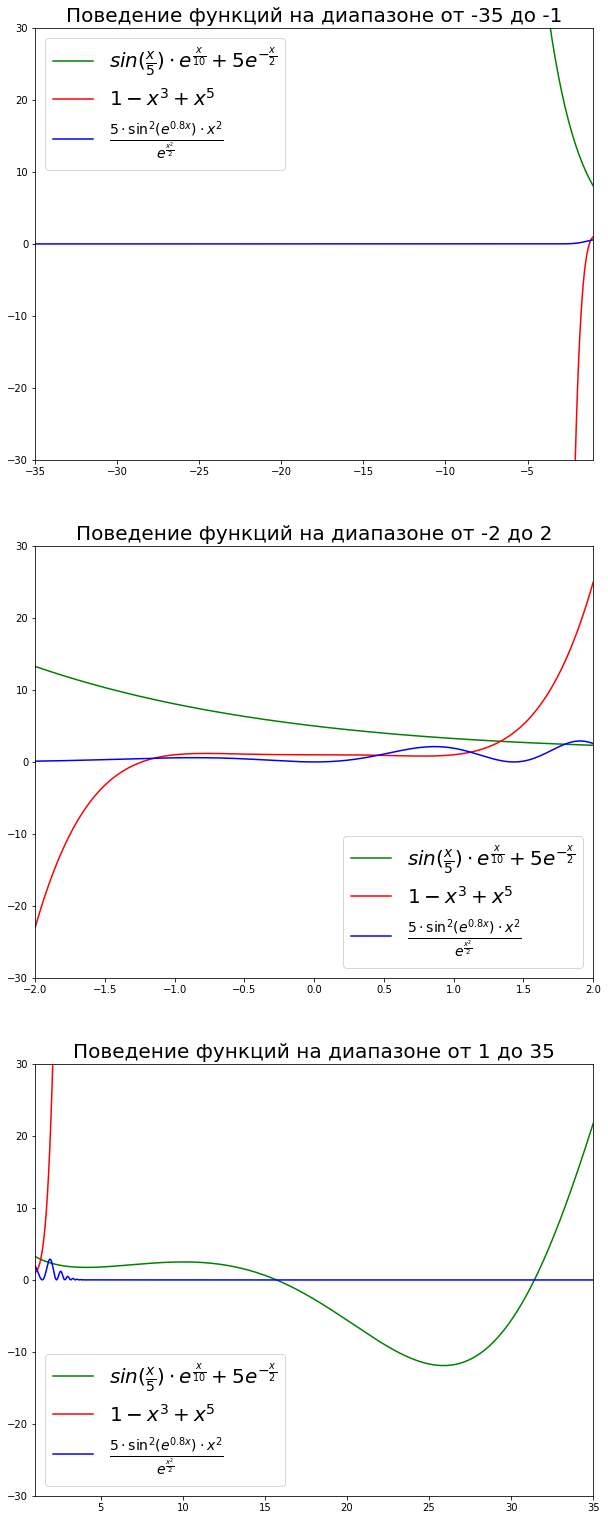

In [3]:
fig, axes = plt.subplots(3, 1, figsize=(10, 27))

functions =[f, g, h]
function_names = [r"$sin(\frac{x}{5})\cdot e^{\frac{x}{10}}+5e^{-\frac{x}{2}}$",
                 r"$1 - x^3 + x^5$",
                 r"$\frac{5\cdot\sin^2{(e^{0.8x})}\cdot x^2}{e^{\frac{x^2}{2}}}$"]
colors = ['g', 'r', 'b']
x1 = np.linspace(-35, -1, 500)
x2 = np.linspace(-2, 2, 200)
x3 = np.linspace(1, 35, 500)

for index, x in enumerate([x1, x2, x3]):
    lines = []
    ax = axes[index]
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-30, 30)
    for function, function_name, color in zip(functions, function_names, colors):
        line, = ax.plot(x, function(x), c=color, label=function_name)
        lines.append(line)
    ax.legend(handles=lines, fontsize=20)
    ax.set_title(label=f"Поведение функций на диапазоне от {int(x[0])} до {int(x[-1])}", fontsize=20)

plt.show()

Выводы:
1. f(x) ярко себя проявляет как периодическая функция на всем промежутке
2. g(x) монотонно возрастает, выходит на плато в дапазоне от -1 до 1, в этом же месте находится точка перегиба
3. h(x) похожа на периодическую, но ярко проявляющуюся только на диапазоне от 0 до 3

## Задание 2

* Постройте в одних осях графики разных функций, чтобы исследовать их точки пересечений.
* Примерно определите координаты точек пересечений и поставьте соответствующие маркеры поверх них. 

In [43]:
from scipy.optimize import fsolve

def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

In [44]:
x1 = findIntersection(g, h, -1.5)
y1 = g(x1)

x2 = findIntersection(g, h, 0.3)
y2 = g(x2)

x3 = findIntersection(g, h, 1)
y3 = g(x3)

x4 = findIntersection(f, g, 1.2)
y4 = g(x4)

x5 = findIntersection(f, h, 1.6)
y5 = f(x5)

x6 = findIntersection(f, h, 2)
y6 = f(x6)

xs = [x1, x2, x3, x4, x5, x6]
ys = [y1, y2, y3, y4, y5, y6]

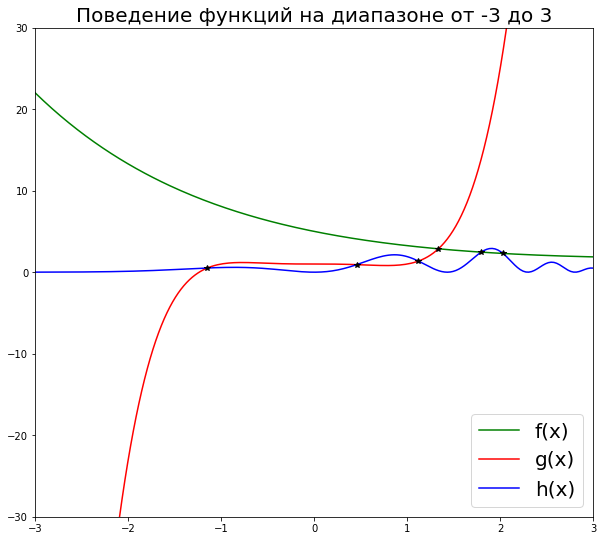

In [49]:
fig, ax = plt.subplots(figsize=(10, 9))

functions =[f, g, h]
function_names = ["f(x)", "g(x)", "h(x)"]
colors = ['g', 'r', 'b']
x = np.linspace(-3, 3, 200)

ax.set_xlim(x[0], x[-1])
ax.set_ylim(-30, 30)

lines = []
for function, function_name, color in zip(functions, function_names, colors):
    line, = ax.plot(x, function(x), c=color, label=function_name)
    lines.append(line)
ax.legend(handles=lines, fontsize=20)
ax.plot(xs, ys, 'k*')

ax.set_title(label=f"Поведение функций на диапазоне от {int(x[0])} до {int(x[-1])}", fontsize=20)
plt.show()